# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     2.978199e+01     6.484482e+00
 * time: 0.00463414192199707
     1     2.820741e+01     4.520465e+00
 * time: 0.02067708969116211
     2     1.958007e+01     4.590268e+00
 * time: 0.040162086486816406
     3     1.298568e+01     3.144698e+00
 * time: 0.05985116958618164
     4     1.099194e+01     1.457209e+00
 * time: 0.1936931610107422
     5     1.007629e+01     2.033981e+00
 * time: 0.20947003364562988
     6     9.605847e+00     1.258220e+00
 * time: 0.22446703910827637
     7     9.209302e+00     1.325084e+00
 * time: 0.2392110824584961
     8     8.760978e+00     1.037111e+00
 * time: 0.2539560794830322
     9     8.409979e+00     9.379686e-01
 * time: 0.26883816719055176
    10     8.250564e+00     5.871775e-01
 * time: 0.2836000919342041
    11     8.167236e+00     6.589385e-01
 * time: 0.2983090877532959
    12     8.089849e+00     5.124892e-01
 * time: 0.31304097175598145
    13     8.029324e+00     4.823245e-01
 * time: 0.3

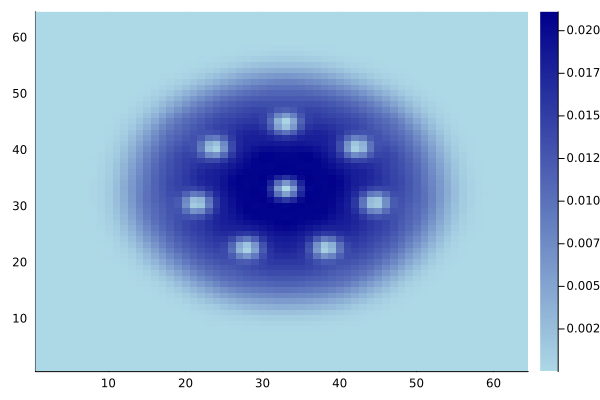

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)